In [54]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
from Vis import plot_loss, plot_roc
from Preprocessing import Preprocessing
from Preprocessing import Cols
import numpy as np
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler
from pandas import DataFrame
from pandas import Series
import pandas as pd
from keras.layers import Dropout
# pandas.set_option('max_columns',10)

In [2]:
pre = Preprocessing()
X, y = pre.load_data(time_gap=300)

prepared dataset contains: per_stud_dataset + per_action_dataset_summ


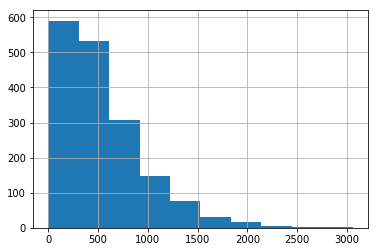

In [3]:
# number of actions for each student before summarization
pre.raw_dataset.groupby("ITEST_id").size().hist()

In [4]:
# having a sense about input dataset
print("shape of X: {0}".format(X.shape))
print("shape of y: {0}".format(y.shape))
print("X:")
X[X.index.get_level_values(0) ==9]

shape of X: (4362, 193)
shape of y: (4362, 1)
X:


NumActions  MCAS  AveCarelessness   AveKnow  SchoolId  \
ITEST_id seq_ix                                                          
9        0              504    32         0.099734  0.185138         2   
         1              504    32         0.099734  0.185138         2   
         2              504    32         0.099734  0.185138         2   
         3              504    32         0.099734  0.185138         2   
         4              504    32         0.099734  0.185138         2   
         5              504    32         0.099734  0.185138         2   
         6              504    32         0.099734  0.185138         2   

                 min_hint  min_sumTimePerSkill  min_frIsHelpRequest  \
ITEST_id seq_ix                                                       
9        0              0                 15.0                    0   
         1              0                 11.0                    0   
         2              0                 18.0                    0   
         3              0                  7.0                    0   
         4              0                  4.0                    0   
         5              0                 18.0                    0   
         6              0                 32.0                    0   

                 min_totalFrPastWrongCount  min_helpAccessUnder2Sec  \
ITEST_id seq_ix                                                       
9        0                               0                        0   
         1                               0                        0   
         2                               0                        0   
         3                               0                        0   
         4                               0                        0   
         5                               0                        0   
         6                               0                        0   

                             ...                sum_hintCount  \
ITEST_id seq_ix              ...                                
9        0                   ...                           64   
         1                   ...                           72   
         2                   ...                           56   
         3                   ...                           50   
         4                   ...                           33   
         5                   ...                           10   
         6                   ...                           50   

                 sum_frPast8WrongCount  sum_timeTaken  sum_sumRight  \
ITEST_id seq_ix                                                       
9        0                           0    3068.000001           396   
         1                          36    3478.000000          2613   
         2                          79    2324.000000          5159   
         3                          50    4309.000000          8156   
         4                          55    2365.000000          6763   
         5                         102    2318.000000         11046   
         6                          97    3555.000000         16880   

                 sum_totalFrSkillOpportunitiesByScaffolding  \
ITEST_id seq_ix                                               
9        0                                        31.100000   
         1                                        87.533333   
         2                                        61.171429   
         3                                        57.766666   
         4                                        59.484524   
         5                                        71.777542   
         6                                        76.372620   

                 sum_timeGreater5Secprev2wrong  sum_RES_BORED  sum_manywrong  \
ITEST_id seq_ix                                                                
9        0                                   6      17.078761             40   
         1                          

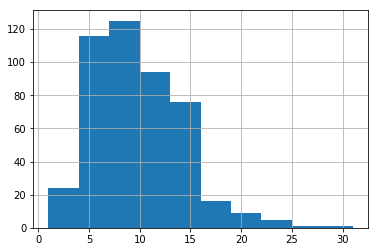

In [5]:
# number of actions for each student **after** summarization
X.groupby("ITEST_id").size().hist()

In [6]:
# scaling dataset
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled[X_scaled.index.get_level_values(0) ==9]

NumActions      MCAS  AveCarelessness   AveKnow  SchoolId  \
ITEST_id seq_ix                                                              
9        0        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         1        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         2        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         3        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         4        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         5        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         6        -0.126506  0.115385        -0.143416 -0.107453       0.0   

                 min_hint  min_sumTimePerSkill  min_frIsHelpRequest  \
ITEST_id seq_ix                                                       
9        0            0.0            -0.177778                  0.0   
         1            0.0            -0.266667                  0.0   
         2            0.0            -0.111111                  0.0   
         3            0.0            -0.355556                  0.0   
         4            0.0            -0.422222                  0.0   
         5            0.0            -0.111111                  0.0   
         6            0.0             0.200000                  0.0   

                 min_totalFrPastWrongCount  min_helpAccessUnder2Sec  \
ITEST_id seq_ix                                                       
9        0                             0.0                      0.0   
         1                             0.0                      0.0   
         2                             0.0                      0.0   
         3                             0.0                      0.0   
         4                             0.0                      0.0   
         5                             0.0                      0.0   
         6                             0.0                      0.0   

                             ...                sum_hintCount  \
ITEST_id seq_ix              ...                                
9        0                   ...                     0.579710   
         1                   ...                     0.695652   
         2                   ...                     0.463768   
         3                   ...                     0.376812   
         4                   ...                     0.130435   
         5                   ...                    -0.202899   
         6                   ...                     0.376812   

                 sum_frPast8WrongCount  sum_timeTaken  sum_sumRight  \
ITEST_id seq_ix                                                       
9        0                   -0.557377       0.993274     -0.370398   
         1                    0.032787       1.337957     -0.146340   
         2                    0.737705       0.367802      0.110968   
         3                    0.262295       2.036570      0.413856   
         4                    0.344262       0.402270      0.273074   
         5                    1.114754       0.362757      0.705930   
         6                    1.032787       1.402690      1.295536   

                 sum_totalFrSkillOpportunitiesByScaffolding  \
ITEST_id seq_ix                                               
9        0                                        -0.148425   
         1                                         0.773715   
         2                                         0.342953   
         3                                         0.287318   
         4                                         0.315388   
         5                                         0.516260   
         6                                         0.591345   

                 sum_timeGreater5Secprev2wrong  sum_RES_BORED  sum_manywrong  \
ITEST_id seq_ix                                                                
9        0                                1.25       0.445192          0.400   


In [7]:
# defining sequence length (or number of time-steps) for each student and batch-size
# NOTE that in Keras by default network is updated after each batch and the hidden state is reset after each epoch
batch_size=1
max_length_seq = 10

In [8]:
# padding sequences to have a same length
X_padded = []
for stud_id, stud_seq in X_scaled.groupby(by='ITEST_id'):
    X_padded.append(stud_seq)
X_padded = sequence.pad_sequences(X_padded, max_length_seq, dtype='float64')

In [9]:
# getting a sense about padded dataset
new_seq_ix = pd.Index(list(range(0,max_length_seq))* X_padded.shape[0], name="seq_ix")
ITEST_ix = pd.Index(np.repeat(sorted(X.index.get_level_values(0).unique()), max_length_seq), name='ITEST_id')
DataFrame(X_padded.reshape(X_padded.shape[0]*X_padded.shape[1], -1), index=[ITEST_ix, new_seq_ix], columns=X.columns)

NumActions      MCAS  AveCarelessness   AveKnow  SchoolId  \
ITEST_id seq_ix                                                              
9        0         0.000000  0.000000         0.000000  0.000000       0.0   
         1         0.000000  0.000000         0.000000  0.000000       0.0   
         2         0.000000  0.000000         0.000000  0.000000       0.0   
         3        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         4        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         5        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         6        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         7        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         8        -0.126506  0.115385        -0.143416 -0.107453       0.0   
         9        -0.126506  0.115385        -0.143416 -0.107453       0.0   
27       0         0.000000  0.000000         0.000000  0.000000       0.0   
         1        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
         2        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
         3        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
         4        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
         5        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
         6        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
         7        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
         8        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
         9        -0.879518 -0.307692        -0.453280 -0.320630      -1.0   
33       0         0.000000  0.000000         0.000000  0.000000       0.0   
         1         0.000000  0.000000         0.000000  0.000000       0.0   
         2         0.000000  0.000000         0.000000  0.000000       0.0   
         3         0.000000  0.000000         0.000000  0.000000       0.0   
         4        -0.799197  0.884615         0.905730  1.250917       0.0   
         5        -0.799197  0.884615         0.905730  1.250917       0.0   
         6        -0.799197  0.884615         0.905730  1.250917       0.0   
         7        -0.799197  0.884615         0.905730  1.250917       0.0   
         8        -0.799197  0.884615         0.905730  1.250917       0.0   
         9        -0.799197  0.884615         0.905730  1.250917       0.0   
...                     ...       ...              ...       ...       ...   
7769     0         0.000000  0.000000         0.000000  0.000000       0.0   
         1         0.000000  0.000000         0.000000  0.000000       0.0   
         2         0.000000  0.000000         0.000000  0.000000       0.0   
         3        -0.640562  0.615385         0.215826  0.406774       0.0   
         4        -0.640562  0.615385         0.215826  0.406774       0.0   
         5        -0.640562  0.615385         0.215826  0.406774       0.0   
         6        -0.640562  0.615385         0.215826  0.406774       0.0   
         7        -0.640562  0.615385         0.215826  0.406774       0.0   
         8        -0.640562  0.615385         0.215826  0.406774       0.0   
         9        -0.640562  0.615385         0.215826  0.406774       0.0   
7775     0         0.457831 -0.615385        -0.344665 -0.528356      -1.0   
         1         0.457831 -0.615385        -0.344665 -0.528356      -1.0   
         2         0.457831 -0.615385        -0.344665 -0.528356      -1.0   
         3         0.457831 -0.615385        -0.344665 -0.528356      -1.0   
         4         0.457831 -0.615385        -0.344665 -0.528356      -1.0   
         5         0.457831 -0.615385        -0.344665 -0.528356      -1.0   
         6         0.457831 -0.615385        -0.344665 -0.528356      -1.0   
         7         0.457831 -0.615385        -0.344665 -0.528356      -1.0   
         8         0.457831 -0.615385  

In [37]:
# saving the final dataset prepared for training into the file to check the sanity and validate its truth!
X_prepared_tofile = DataFrame(X_prepared.reshape(X_prepared.shape[0]*X_prepared.shape[1], -1), index=[ITEST_ix, new_seq_ix], columns=X.columns)
X_prepared_tofile['y'] = np.repeat(y_prepared, 10)
X_prepared_tofile.to_csv("final.csv")

(467, 10, 193)
(467,)


In [38]:
X_prepared = X_padded
y_prepared = y[~y.index.duplicated()].sort_index().values.flatten()

# splitting train/test data 
X_train, X_test, y_train,y_test = train_test_split(X_prepared,y_prepared, train_size=.95)

In [51]:
def create_LSTM_model(max_length_seq, feature_size):
    # create the LSTM network
    model = Sequential()
    model.add(LSTM(100, input_shape=(max_length_seq, feature_size)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [52]:
# Create model
model = create_LSTM_model(max_length_seq, X_train.shape[2])
history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.33)

Train on 296 samples, validate on 147 samples
Epoch 1/5
296/296 [==============================] - 6s - loss: 0.6292 - acc: 0.6926 - val_loss: 0.5536 - val_acc: 0.7755
Epoch 2/5
296/296 [==============================] - 5s - loss: 0.4732 - acc: 0.7601 - val_loss: 0.5478 - val_acc: 0.7211
Epoch 3/5
296/296 [==============================] - 5s - loss: 0.4016 - acc: 0.8176 - val_loss: 0.5610 - val_acc: 0.7143
Epoch 4/5
296/296 [==============================] - 5s - loss: 0.3189 - acc: 0.8716 - val_loss: 0.6039 - val_acc: 0.7075
Epoch 5/5
296/296 [==============================] - 5s - loss: 0.2588 - acc: 0.8986 - val_loss: 0.6713 - val_acc: 0.6939


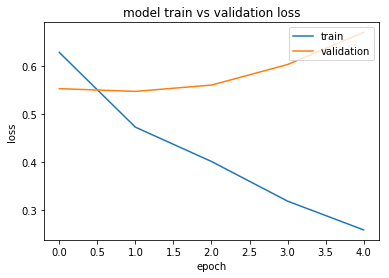

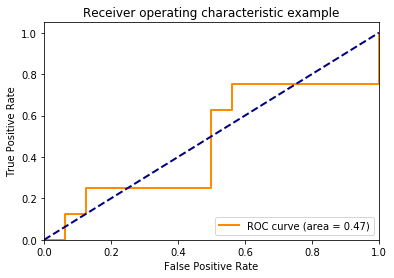

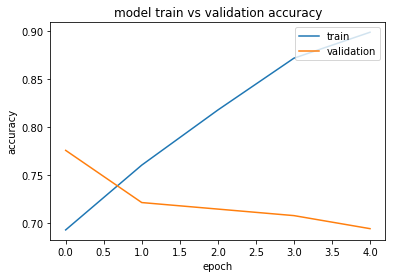

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100)               117600    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 117,701
Trainable params: 117,701
Non-trainable params: 0
_________________________________________________________________
None
Test ROC Score: 0.468750
Test RMSE Score: 0.547058
Final Competition Score: 0.921692


In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from Vis import plot_accuracy
# do prediction
y_pred = model.predict(X_test, batch_size=batch_size)

# calculating scores
roc_score = roc_auc_score(y_test, y_pred)
mse_score = mean_squared_error(y_test, y_pred)

# printing and plotting model and score information
plot_loss(history)
plot_roc(y_test, y_pred)
plot_accuracy(history)

print(model.summary())
print("Test ROC Score: %f" % roc_score)
print("Test RMSE Score: %f" % sqrt(mse_score))
print("Final Competition Score: %f" % (1 - sqrt(mse_score) + roc_score))